<a href="https://colab.research.google.com/github/Momentum1ab/MomentumScreener/blob/main/1%2C3%2C6m_MomentumScreener_V2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pandas numpy yfinance pytesseract pillow

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

Error analyzing TATATECH.NS: single positional indexer is out-of-bounds
Error analyzing UNITDSPR.NS: single positional indexer is out-of-bounds


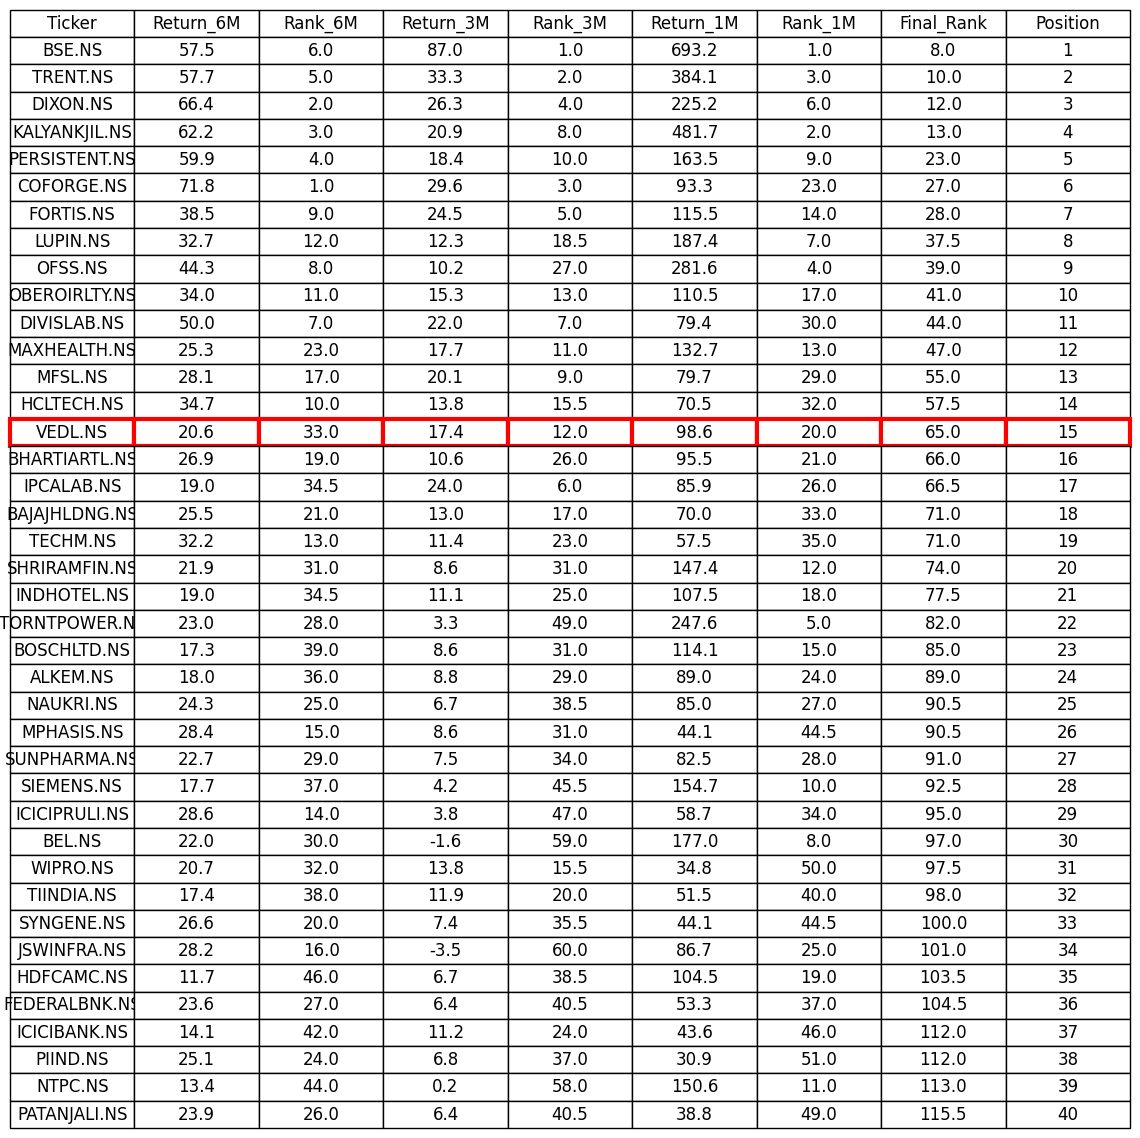

In [3]:

import yfinance as yf
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
from matplotlib.table import Table

# List of tickers
tickers = ["RELIANCE.NS", "TCS.NS", "HDFCBANK.NS", "BHARTIARTL.NS", "ICICIBANK.NS", "SBIN.NS", "INFY.NS",
           "LICI.NS", "HINDUNILVR.NS", "ITC.NS", "LT.NS", "BAJFINANCE.NS", "MARUTI.NS", "HCLTECH.NS",
           "ADANIENT.NS", "AXISBANK.NS", "SUNPHARMA.NS", "TATAMOTORS.NS", "TATAMTRDVR.NS", "M&M.NS",
           "NTPC.NS", "KOTAKBANK.NS", "ONGC.NS", "HAL.NS", "DMART.NS", "TITAN.NS", "ULTRACEMCO.NS",
           "ADANIPORTS.NS", "ADANIPOWER.NS", "ADANIGREEN.NS", "COALINDIA.NS", "POWERGRID.NS", "ASIANPAINT.NS",
           "BAJAJ-AUTO.NS", "WIPRO.NS", "BAJAJFINSV.NS", "SIEMENS.NS", "NESTLEIND.NS", "IOC.NS", "IRFC.NS",
           "JIOFIN.NS", "TATASTEEL.NS", "JSWSTEEL.NS", "DLF.NS", "BEL.NS", "VBL.NS", "TRENT.NS", "VEDL.NS",
           "ABB.NS", "INDIGO.NS", "ZOMATO.NS", "GRASIM.NS", "PFC.NS", "PIDILITIND.NS", "AMBUJACEM.NS",
           "HINDALCO.NS", "LTIM.NS", "GODREJCP.NS", "SBILIFE.NS", "LODHA.NS", "TATAPOWER.NS", "BANKBARODA.NS",
           "GAIL.NS", "PNB.NS", "TECHM.NS", "BRITANNIA.NS", "RECLTD.NS", "EICHERMOT.NS", "BPCL.NS",
           "HDFCLIFE.NS", "CIPLA.NS", "DIVISLAB.NS", "HAVELLS.NS", "INDUSINDBK.NS", "TVSMOTOR.NS",
           "ADANIENSOL.NS", "CHOLAFIN.NS", "UNIONBANK.NS", "HEROMOTOCO.NS", "JSWENERGY.NS", "DABUR.NS",
           "TATACONSUM.NS", "CANBK.NS", "ATGL.NS", "ZYDUSLIFE.NS", "MOTHERSON.NS", "IDEA.NS", "JINDALSTEL.NS",
           "NHPC.NS", "POLYCAB.NS", "CGPOWER.NS", "DRREDDY.NS", "CUMMINSIND.NS", "BHEL.NS", "TORNTPHARM.NS",
           "SHREECEM.NS", "SHRIRAMFIN.NS", "INDUSTOWER.NS", "BAJAJHLDNG.NS", "IDBI.NS", "BOSCHLTD.NS",
           "APOLLOHOSP.NS", "MANKIND.NS", "MARICO.NS", "INDHOTEL.NS", "ICICIPRULI.NS", "HDFCAMC.NS",
           "ICICIGI.NS", "COLPAL.NS", "NAUKRI.NS", "MAXHEALTH.NS", "GODREJPROP.NS", "IRCTC.NS", "RVNL.NS",
           "TIINDIA.NS", "NMDC.NS", "LUPIN.NS", "HINDPETRO.NS", "AUROPHARMA.NS", "BHARATFORG.NS",
           "SUPREMEIND.NS", "OFSS.NS", "YESBANK.NS", "INDIANB.NS", "TORNTPOWER.NS", "PRESTIGE.NS",
           "OBEROIRLTY.NS", "SRF.NS", "SBICARD.NS", "ASHOKLEY.NS", "SUZLON.NS", "OIL.NS", "CONCOR.NS",
           "MAZDOCK.NS", "SAIL.NS", "BALKRISIND.NS", "ABCAPITAL.NS", "DIXON.NS", "PERSISTENT.NS", "ALKEM.NS",
           "JSWINFRA.NS", "POLICYBZR.NS", "ASTRAL.NS", "BERGEPAINT.NS", "PIIND.NS", "BANKINDIA.NS",
           "IDFCFIRSTB.NS", "MRF.NS", "BDL.NS", "SJVN.NS", "GMRINFRA.NS", "TATACOMM.NS", "PATANJALI.NS",
           "LTTS.NS", "AUBANK.NS", "NYKAA.NS", "VOLTAS.NS", "MAHABANK.NS", "ACC.NS", "MPHASIS.NS", "FACT.NS",
           "PETRONET.NS", "APLAPOLLO.NS", "TATAELXSI.NS", "ESCORTS.NS", "TATATECH.NS", "PAGEIND.NS",
           "KALYANKJIL.NS", "LTF.NS", "KPITTECH.NS", "UPL.NS", "GUJGASLTD.NS", "BIOCON.NS", "FEDERALBNK.NS",
           "SONACOMS.NS", "LICHSGFIN.NS", "BSE.NS", "COFORGE.NS", "POONAWALLA.NS", "FORTIS.NS", "M&MFIN.NS",
           "JUBLFOOD.NS", "DALBHARAT.NS", "ABFRL.NS", "IGL.NS", "MFSL.NS", "BANDHANBNK.NS", "DEEPAKNTR.NS",
           "APOLLOTYRE.NS", "GLAND.NS", "IPCALAB.NS", "DELHIVERY.NS", "SUNTV.NS", "SYNGENE.NS", "TATACHEM.NS",
           "PAYTM.NS", "LAURUSLABS.NS", "LALPATHLAB.NS", "PEL.NS", "ZEEL.NS","UNITDSPR.NS"]

# Function to fetch historical data
def get_data(ticker, start_date, end_date):
    return yf.download(ticker, start=start_date, end=end_date, multi_level_index=False)

# Set dates
end_date = datetime.today()
start_date = end_date - timedelta(days=365 * 2)  # 2 years of data for moving averages

# Data dictionary to hold stock data
data = {}

# Fetch data for all tickers
for ticker in tickers:
    try:
        stock_data = get_data(ticker, start_date, end_date)
        if len(stock_data) > 0:
            data[ticker] = stock_data
    except Exception as e:
        print(f"Error fetching data for {ticker}: {e}")

# Create a DataFrame for summary
summary = []

# Analyze each stock
for ticker, df in data.items():
    try:
        # Calculate EMAs
        df['EMA100'] = df['Adj Close'].ewm(span=100).mean()

        # Last 1-year return
        one_year_return = (df['Adj Close'].iloc[-1] / df['Adj Close'].iloc[-252] - 1) * 100

        # 52-week high
        high_52_week = df['Adj Close'].iloc[-252:].max()
        within_20_pct_high = df['Adj Close'].iloc[-1] >= high_52_week * 0.8

        # More than 45% up days in the last 6 months (126 trading days)
        six_month_data = df['Adj Close'].iloc[-126:]
        up_days = (six_month_data.pct_change() > 0).sum()
        up_days_pct = up_days / len(six_month_data) * 100

        # Filtering criteria
        if (df['Adj Close'].iloc[-1] >= df['EMA100'].iloc[-1] and
            one_year_return >= 6.5 and
            within_20_pct_high and
            up_days_pct > 45):

            # Calculate returns
            return_6m = (df['Adj Close'].iloc[-1] / df['Adj Close'].iloc[-126] - 1) * 100
            return_3m = (df['Adj Close'].iloc[-1] / df['Adj Close'].iloc[-63] - 1) * 100
            return_1m = (df['Adj Close'].iloc[-1] / df['Adj Close'].iloc[21] - 1) * 100

            summary.append({
                'Ticker': ticker,
                'Return_6M': return_6m,
                'Return_3M': return_3m,
                'Return_1M': return_1m,
            })
    except Exception as e:
        print(f"Error analyzing {ticker}: {e}")

# Convert summary to DataFrame
df_summary = pd.DataFrame(summary)

# Round off returns to 1 decimal place
df_summary['Return_6M'] = df_summary['Return_6M'].round(1)
df_summary['Return_3M'] = df_summary['Return_3M'].round(1)
df_summary['Return_1M'] = df_summary['Return_1M'].round(1)

# Ranking based on returns
df_summary['Rank_6M'] = df_summary['Return_6M'].rank(ascending=False)
df_summary['Rank_3M'] = df_summary['Return_3M'].rank(ascending=False)
df_summary['Rank_1M'] = df_summary['Return_1M'].rank(ascending=False)

# Calculate final rank
df_summary['Final_Rank'] = df_summary['Rank_6M'] + df_summary['Rank_3M'] + df_summary['Rank_1M']

# Sort by final rank and get top 30
df_summary_sorted = df_summary.sort_values('Final_Rank').head(40)

# Assign position based on final rank
df_summary_sorted['Position'] = np.arange(1, len(df_summary_sorted) + 1)

# Separate top 15 and next 15
top_15 = df_summary_sorted.head(15)
next_15 = df_summary_sorted.iloc[15:30]

# Prepare table data
tbl_data = []
for i, row in df_summary_sorted.iterrows():
    tbl_data.append([row['Ticker'],
                     row['Return_6M'], row['Rank_6M'],
                     row['Return_3M'], row['Rank_3M'],
                     row['Return_1M'], row['Rank_1M'],
                     row['Final_Rank'], row['Position']])

# Plot the results using matplotlib
fig, ax = plt.subplots(figsize=(14, 10))
ax.axis('tight')
ax.axis('off')

# Create a table
col_labels = ['Ticker', 'Return_6M', 'Rank_6M', 'Return_3M', 'Rank_3M', 'Return_1M', 'Rank_1M', 'Final_Rank','Position']
table = ax.table(cellText=tbl_data, colLabels=col_labels, cellLoc='center', loc='center')
table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(1, 1.5)

# Draw a red line to separate the top 15
for i in range(len(col_labels)):
    cell = table[(15, i)]
    cell.set_edgecolor('red')
    cell.set_linewidth(3)

# Adjust layout
plt.subplots_adjust(left=0.1, top=0.95)  # Adjust top parameter for title position
#plt.title('Top 40 Stocks Momentum Ranking', fontsize=18, y=1.05)  # y parameter for title position
plt.show()